In [1]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc
from herbie import paint

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
H = Herbie(
    "2025-01-10",
    model="hrrr",
    product="sfc",
    fxx=0,
)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jan-10 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [3]:
# COLMD = Total Column-Integrated Mass Density, aka Vertically Integrated Smoke
ds = H.xarray("COLMD")
ds

/home/mgraca/miniconda3/envs/hrrrenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


<xarray.Dataset> Size: 38MB
Dimensions:                (y: 1059, x: 1799)
Coordinates:
    time                   datetime64[ns] 8B 2025-01-10
    step                   timedelta64[ns] 8B 00:00:00
    atmosphereSingleLayer  float64 8B 0.0
    latitude               (y, x) float64 15MB 21.14 21.15 21.15 ... 47.85 47.84
    longitude              (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.1
    valid_time             datetime64[ns] 8B 2025-01-10
    gribfile_projection    object 8B None
Dimensions without coordinates: y, x
Data variables:
    unknown                (y, x) float32 8MB 2.5e-06 2.5e-06 ... 0.0 0.0
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /home/mgraca/data/hrrr/20250110/subset_d9ef105b_...
    search:                  COLMD

In [4]:
ds.unknown

<xarray.DataArray 'unknown' (y: 1059, x: 1799)> Size: 8MB
array([[2.5e-06, 2.5e-06, 2.5e-06, ..., 4.0e-07, 4.0e-07, 4.0e-07],
       [2.5e-06, 2.5e-06, 2.5e-06, ..., 4.0e-07, 4.0e-07, 4.0e-07],
       [2.5e-06, 2.5e-06, 2.6e-06, ..., 5.0e-07, 5.0e-07, 5.0e-07],
       ...,
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00]],
      dtype=float32)
Coordinates:
    time                   datetime64[ns] 8B 2025-01-10
    step                   timedelta64[ns] 8B 00:00:00
    atmosphereSingleLayer  float64 8B 0.0
    latitude               (y, x) float64 15MB 21.14 21.15 21.15 ... 47.85 47.84
    longitude              (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.1
    valid_time             datetime64[ns] 8B 2025-01-10
    gribfile_projection    object 8B None
Dimensions without coordinates: y, x
Attributes: (12/39)
    GRIB_paramId:                             0
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1905141
    GRIB_typeOfLevel:                         atmosphereSingleLayer
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_stepRange:                           0
    GRIB_units:                               unknown
    long_name:                                unknown
    units:                                    unknown
    standard_name:                            unknown
    grid_mapping:                             gribfile_projection

In [5]:
mg_per_k = 1000000
'''
ds['unknown'] = ds['unknown'] * mg_per_k
ds.unknown
# operations erase the attributes, so put this off into the plot function
'''

"\nds['unknown'] = ds['unknown'] * mg_per_k\nds.unknown\n# operations erase the attributes, so put this off into the plot function\n"

In [6]:
# thank you herbie~
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def make_custom_cmaps(name, colors, bounds: list = None, N: int = None):
    if N is None:
        N = len(colors)
    linear_cmap = mcolors.LinearSegmentedColormap.from_list(name, colors)
    segment_cmap = mcolors.LinearSegmentedColormap.from_list(name + "2", colors, N=N)

    # When data is NaN, set color to transparent
    linear_cmap.set_bad("#ffffff00")
    segment_cmap.set_bad("#ffffff00")

    for cm in [linear_cmap, segment_cmap]:
        mpl.colormaps.register(cmap=cm, force=True)
        mpl.colormaps.register(cmap=cm.reversed(), force=True)

    if bounds is not None:
        return (
            mcolors.Normalize(bounds.min(), bounds.max()),
            mcolors.BoundaryNorm(bounds, linear_cmap.N),
        )
        
class COLMDPm25:
    """Colormap for vertically integrated smoke
    """

    name = "vertically-integrated.smoke"
    units = r"$mg m$\mathregular{^{-3}}$"
    variable = "Particulate Matter"
    # colors taken from HRRR-Smoke and using a hex color picker
    colors = np.array(
        [
            "#ffffff",
            "#d0e1f2",
            "#94c4df",
            "#4a98c9",
            "#1764ab",
            "#0f8446",
            "#54b45f",
            "#a2d76a",
            "#fff6b0",
            "#fcaa5f",
            "#f7844e",
            "#ed5f3c",
            "#c21c27",
            "#a50026",
            "#9900fa",           
        ]
    )
    bounds = np.array([0, 1, 4, 7, 11, 15, 20, 25, 30, 40, 50, 75, 150, 250, 500, 501])
    norm, norm2 = make_custom_cmaps(name, colors, bounds)
    cmap = plt.get_cmap(name)
    cmap2 = plt.get_cmap(name + "2")
    kwargs = dict(cmap=cmap, norm=norm)
    kwargs2 = dict(cmap=cmap, norm=norm2)
    cbar_kwargs = dict(label=f"{variable} ({units})")
    cbar_kwargs2 = cbar_kwargs | dict(spacing="proportional", ticks=bounds)

In [7]:
def plot(ds, coords=None, save=False):
    plt.figure()
    ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 8]).BORDERS().STATES().ax
    
    if coords != None:
        ax.set_extent(coords)
    
    p = ax.pcolormesh(
        ds.longitude,
        ds.latitude,
        ds.unknown * mg_per_k,
        transform=pc,
        **COLMDPm25.kwargs2,
    )
    plt.colorbar(
        p,
        ax=ax,
        orientation="horizontal",
        pad=0.01,
        shrink=0.8,
        **COLMDPm25.kwargs2,
    )
    
    ax.set_title(
        f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
        loc="left",
    )
    ax.set_title(ds.unknown.GRIB_name, loc="right")

    if save:
        plt.savefig(f"colmd_images/hrrr_viz_{str(int(ds.step.item() / 3600000000000)).zfill(2)}.png")
        
    plt.show()
    plt.clf()

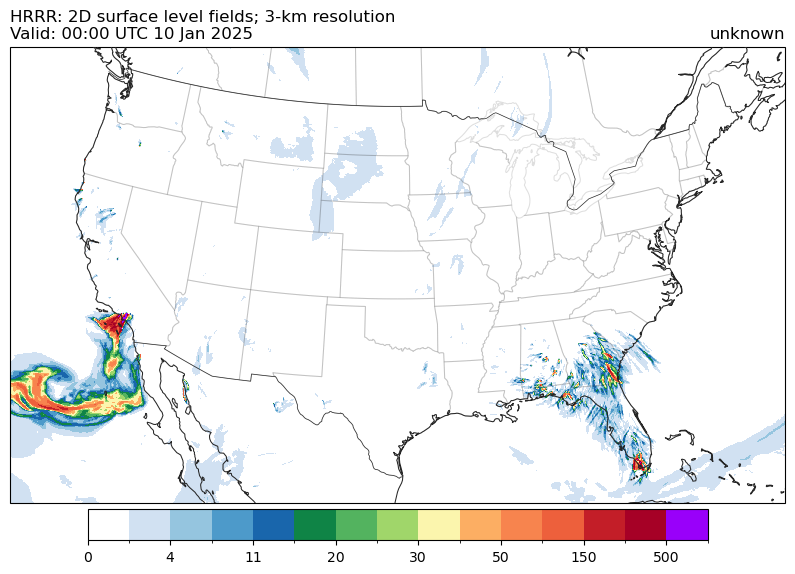

<Figure size 640x480 with 0 Axes>

In [8]:
# lat min, lat_max; long min, long max
coords = {
    "LA" : [-119.1, -117.3, 33.28, 34.86],
    "SOCAL": [-121.34, -114.13, 32.53, 35.79],
}
plot(ds, save=True)

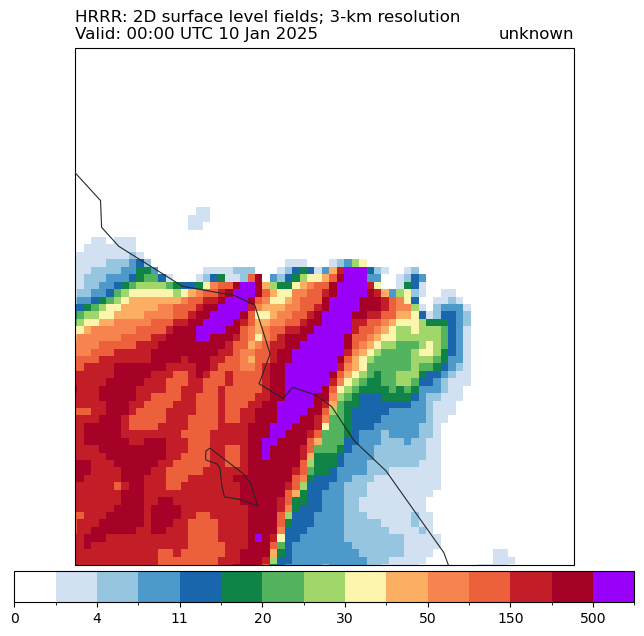

<Figure size 640x480 with 0 Axes>

In [9]:
plot(ds, coords["LA"])

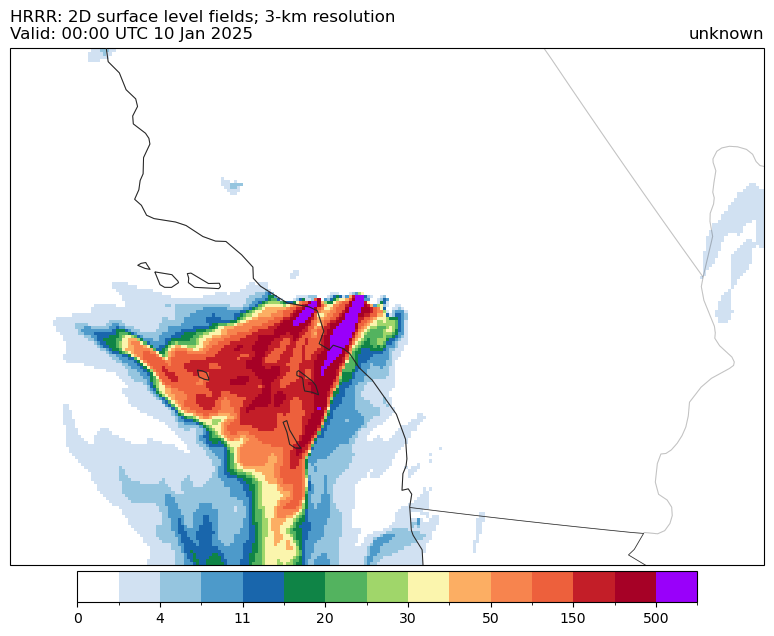

<Figure size 640x480 with 0 Axes>

In [10]:
plot(ds, coords["SOCAL"])

In [11]:
# get 1/10/25 forecast at 00:00 UTC for the next 12 hours
forecasts = []
for i in range(1, 13):
    forecasts.append(
        Herbie(
            "2025-01-10-00",
            model="hrrr",
            product="sfc",
            fxx=i
        )
    )

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jan-10 00:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jan-10 00:00 UTC F02 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jan-10 00:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jan-10 00:00 UTC F04 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jan-10 00:00 UTC F05 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jan-10 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jan-10 00:00 UTC F07 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jan-10 00:00 UTC F08 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jan-10 00:00 UTC F09 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jan-10 00:00 UTC F10 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jan-10 00:00 UTC F11 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr 

In [12]:
# get the vertical column mass density data for each of the forecast time steps
ds_list = []
for i, model in enumerate(forecasts):
    ds_list.append(model.xarray("COLMD"))
    ds = ds_list[-1]
    print(f"Forecast at hour {i+1} downloaded.")

/home/mgraca/miniconda3/envs/hrrrenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Forecast at hour 1 downloaded.


/home/mgraca/miniconda3/envs/hrrrenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Forecast at hour 2 downloaded.


/home/mgraca/miniconda3/envs/hrrrenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Forecast at hour 3 downloaded.


/home/mgraca/miniconda3/envs/hrrrenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Forecast at hour 4 downloaded.


/home/mgraca/miniconda3/envs/hrrrenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Forecast at hour 5 downloaded.


/home/mgraca/miniconda3/envs/hrrrenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Forecast at hour 6 downloaded.


/home/mgraca/miniconda3/envs/hrrrenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Forecast at hour 7 downloaded.


/home/mgraca/miniconda3/envs/hrrrenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Forecast at hour 8 downloaded.


/home/mgraca/miniconda3/envs/hrrrenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Forecast at hour 9 downloaded.


/home/mgraca/miniconda3/envs/hrrrenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Forecast at hour 10 downloaded.


/home/mgraca/miniconda3/envs/hrrrenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Forecast at hour 11 downloaded.
Forecast at hour 12 downloaded.


/home/mgraca/miniconda3/envs/hrrrenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


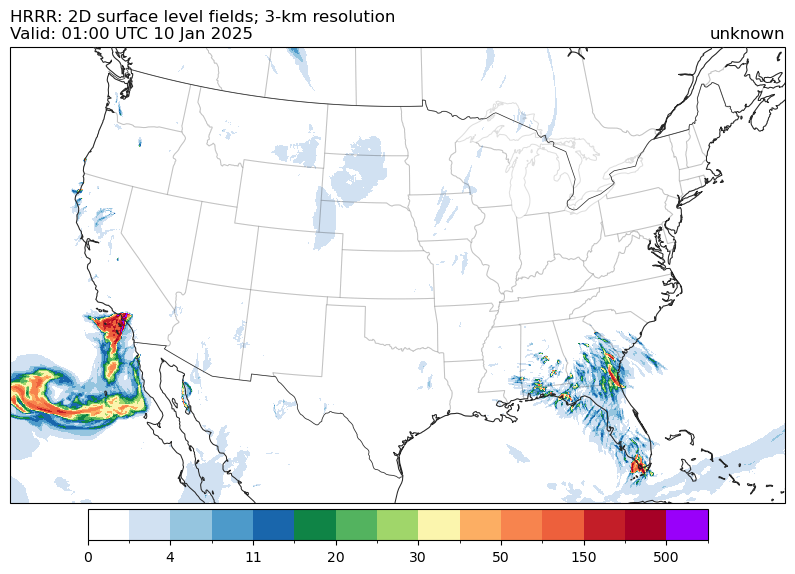

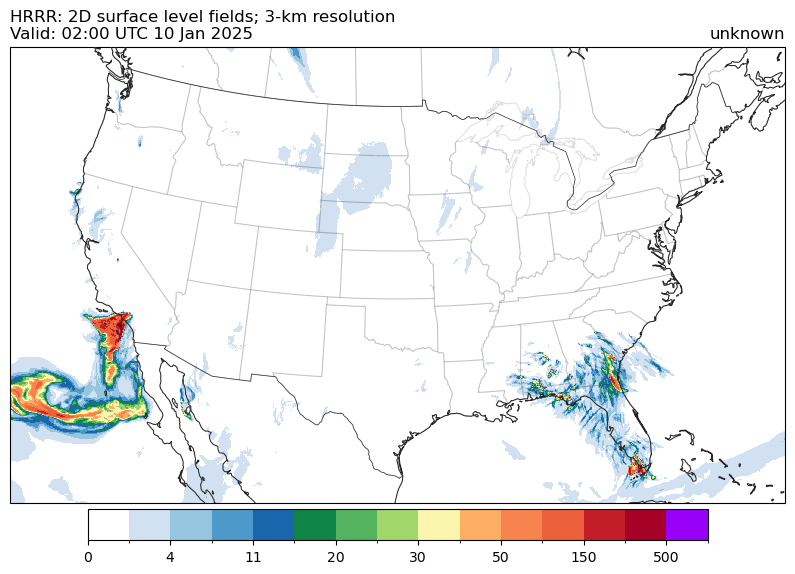

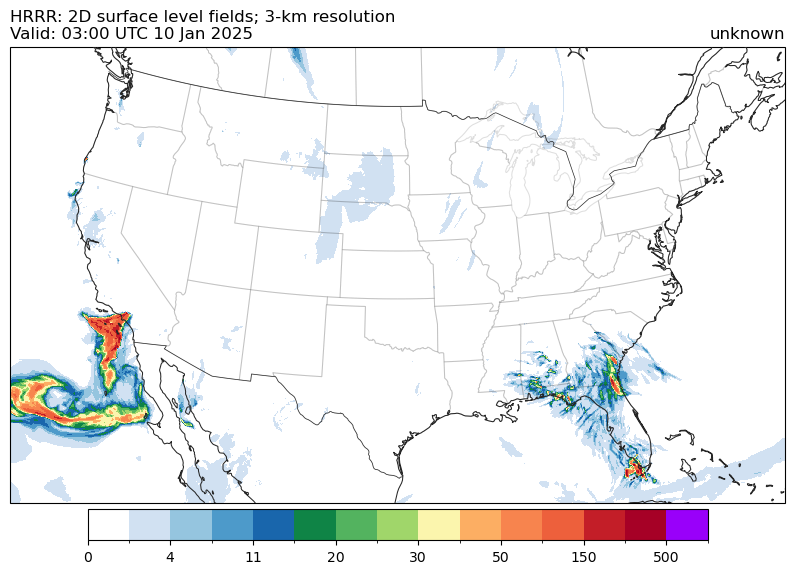

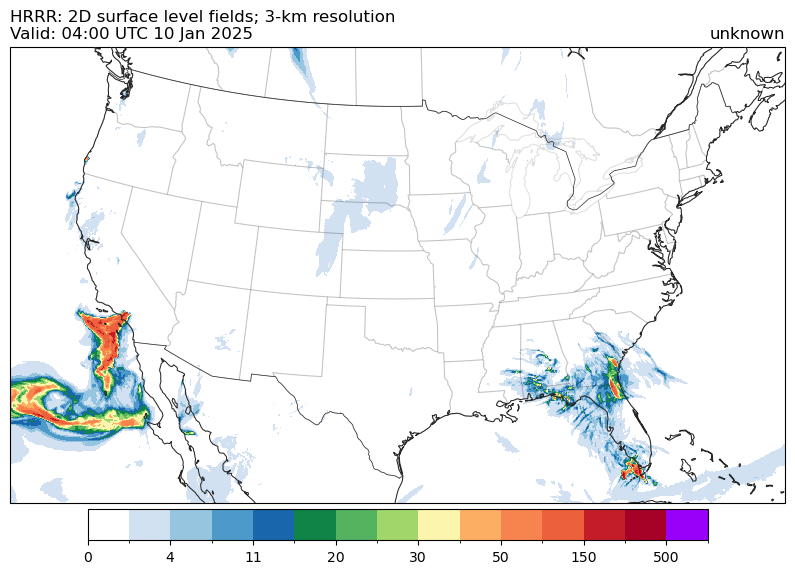

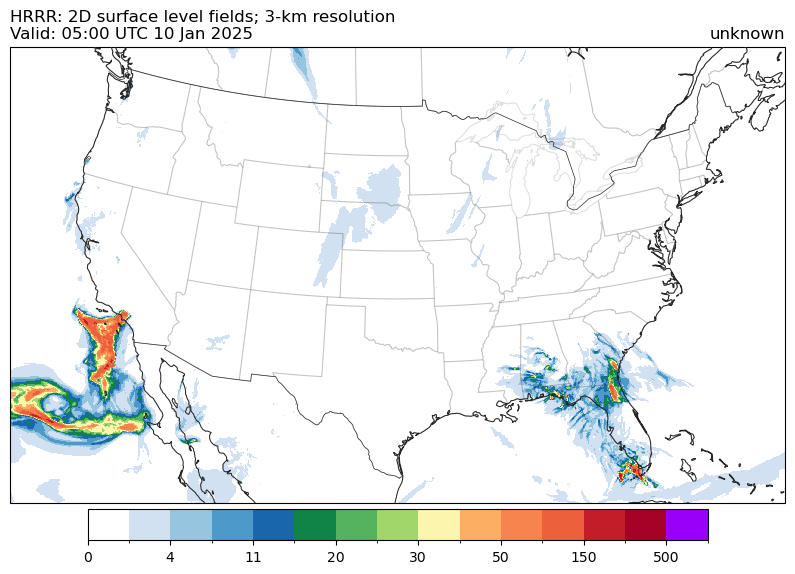

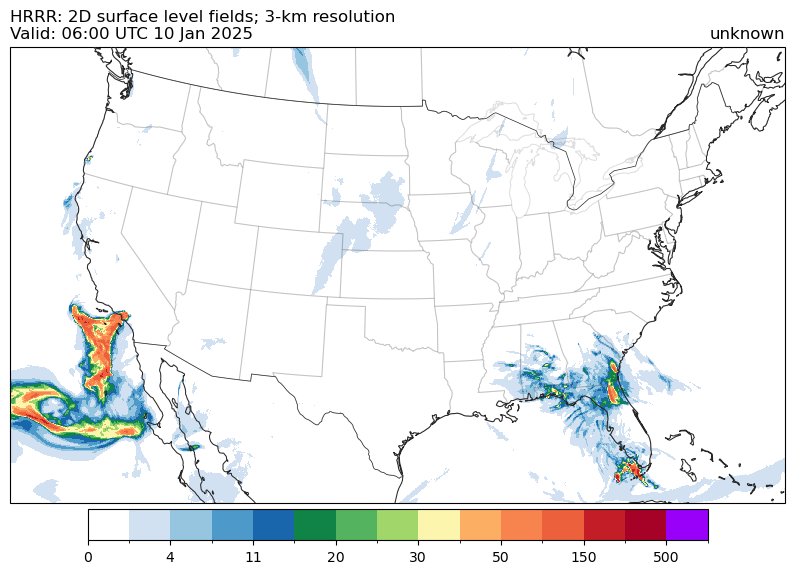

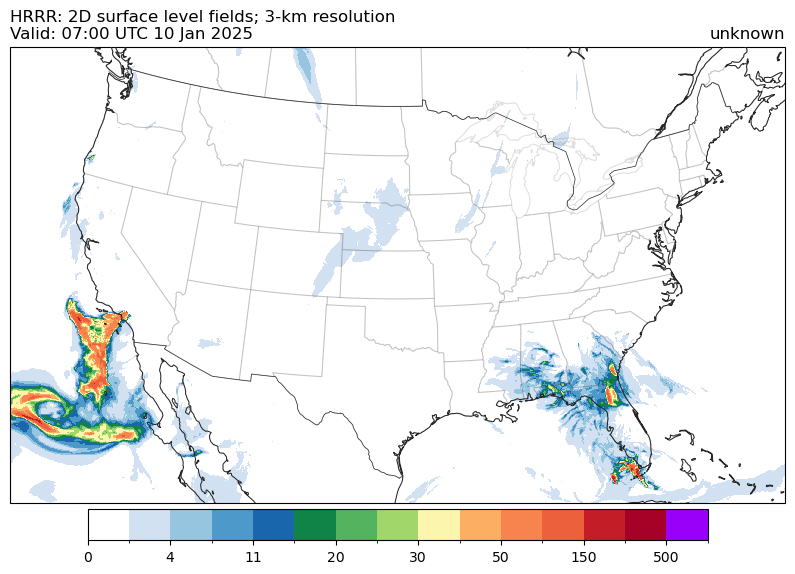

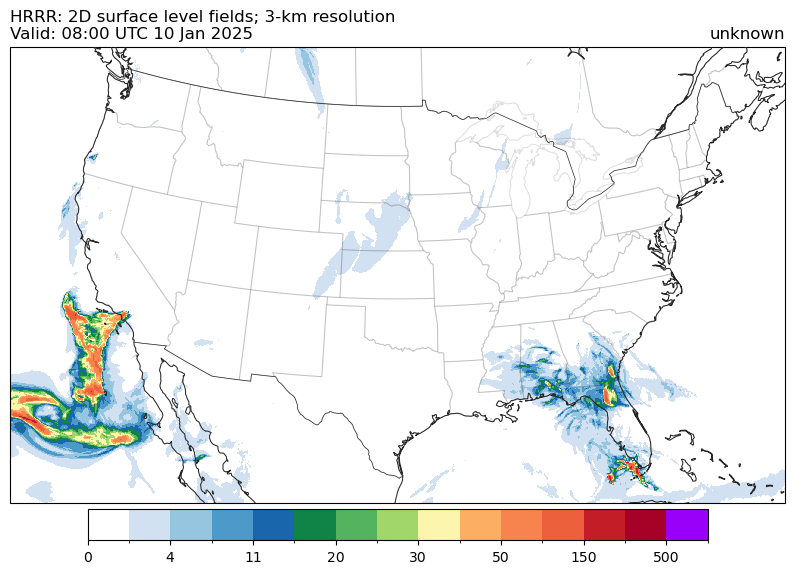

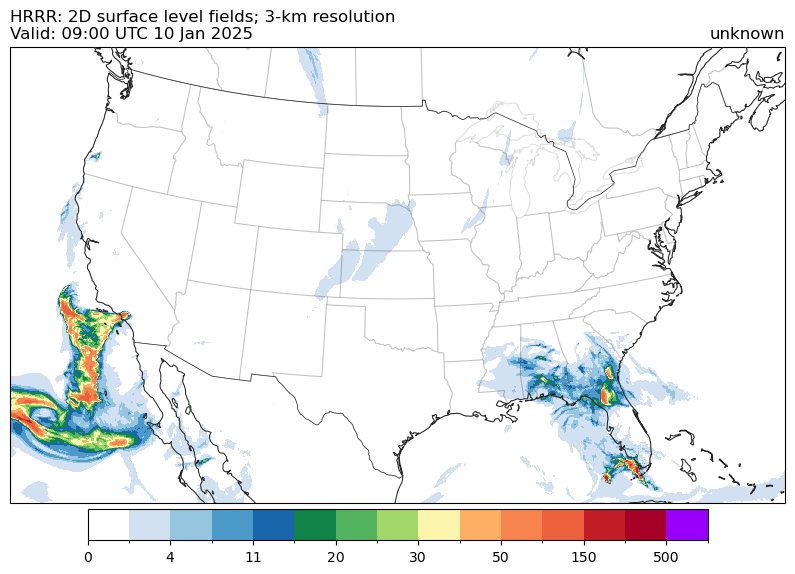

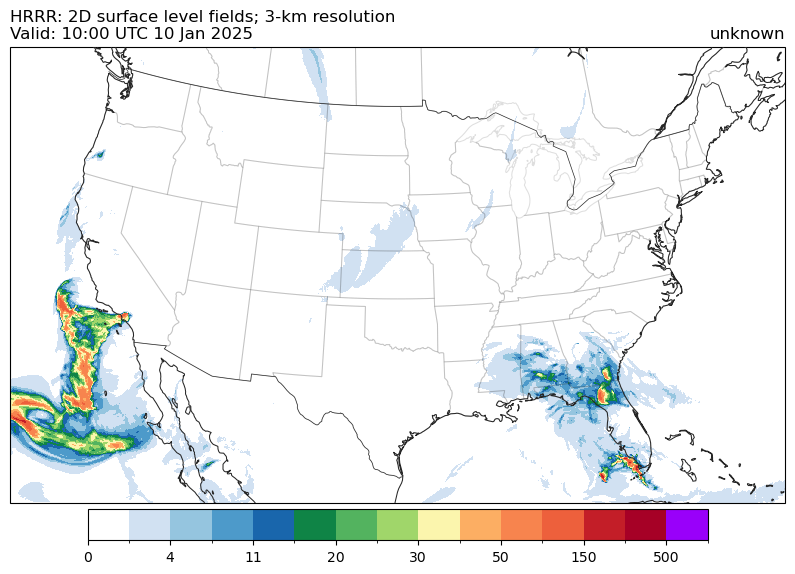

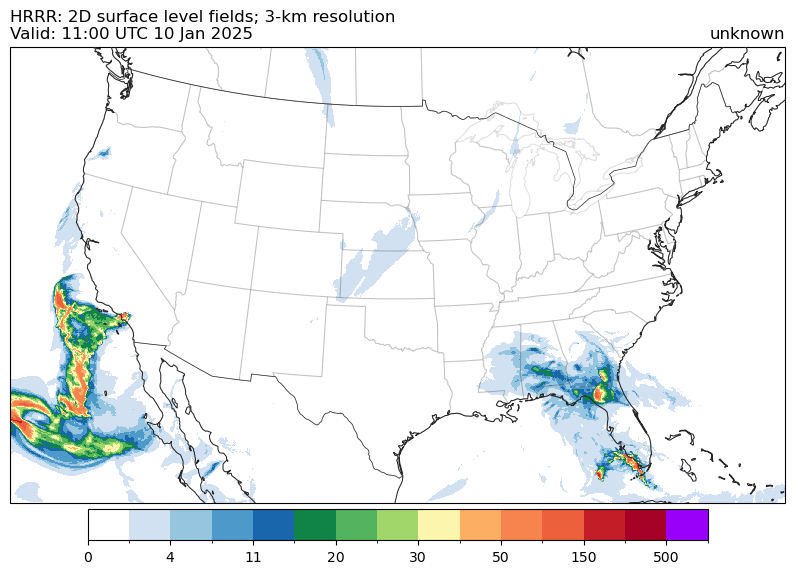

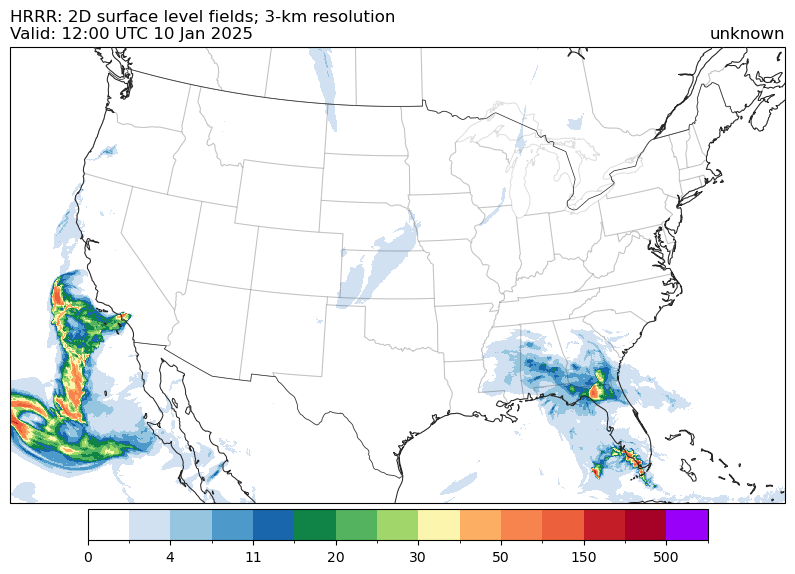

Images received: (13, 800, 1000, 4)


<Figure size 640x480 with 0 Axes>

In [13]:
import glob
from PIL import Image

# plot results, save images
for result in ds_list:
    plot(result, coords=None, save=True)

# read images
image_path = sorted(glob.glob(r"colmd_images/*.png"))
forecast_images = []
for file in image_path:
    image = Image.open(file)
    forecast_images.append(image)
print('Images received:', np.array(forecast_images).shape)

In [14]:
# Stitch the images together to create a gif
forecast_images[0].save(
    "colmd_images/full_forecast.gif", 
    save_all=True, 
    append_images=forecast_images[1:], 
    duration=500, 
    loop=0
)

![](colmd_images/full_forecast.gif)